### KNN алгоритм

https://app.datacamp.com/workspace/w/33a360f3-a716-4921-8e42-7422b06c9872/edit

### Пример 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Были проведены наблюдения за семейными парами, которые счастливо живут в браке, по следующим критериям:

* внешность - симпатичный, несимпатичный
* образованность - без образования, среднее, среднеспециальное, высшее
* характер - уравновешенный, вспыльчивый
* общие интересы - есть, нет

* живут счастливо в паре? - да / нет

In [172]:
cols = ('appearance', 'education', 'character', 'common_interests', 'happiness')

In [173]:
data = [('симпатичный', 'без образования', 'уравновешенный', 'да',1),
('симпатичный', 'без образования', 'уравновешенный', 'нет',0),
('симпатичный', 'среднее', 'вспыльчивый', 'да',1),
('симпатичный', 'высшее', 'вспыльчивый', 'нет',0),
('несимпатичный', 'среднее', 'уравновешенный', 'да',1),
('несимпатичный', 'высшее', 'уравновешенный', 'нет',0)]

In [174]:
df = pd.DataFrame(data, columns=cols)

кодируем текст в цифры

In [175]:
# импортируем LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

In [177]:
# Converting string labels into numbers.
appearance_encoded=le.fit_transform(df.appearance)
print(appearance_encoded)

[1 1 1 1 0 0]


In [179]:
# Converting string labels into numbers.
character_encoded=le.fit_transform(df.character)
print(character_encoded)

[1 1 0 0 1 1]


In [180]:
# Converting string labels into numbers.
common_interests_encoded=le.fit_transform(df.common_interests)
print(common_interests_encoded)

[0 1 0 1 0 1]


In [178]:
# Converting string labels into numbers.
education_encoded=le.fit_transform(df.education)
print(education_encoded)

[0 0 2 1 2 1]


In [181]:
# объединяем
features=list(zip(appearance_encoded,education_encoded, character_encoded, common_interests_encoded))
features

[(1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 2, 0, 0),
 (1, 1, 0, 1),
 (0, 2, 1, 0),
 (0, 1, 1, 1)]

обучаем

In [182]:
from sklearn.neighbors import KNeighborsClassifier

#создаем объект класса KNeighborsClassifier, в качестве параметра количество соседей
knn = KNeighborsClassifier(n_neighbors = 3)  #К - количество соседей здесь равно 1

#обучаем модель, вызываем функцию fit
knn.fit(features, df['happiness'])

KNeighborsClassifier(n_neighbors=3)

прогноз

In [185]:
test = [(0, 0, 1, 1),(1, 1, 0, 0)]

y_pred = knn.predict(test)
y_pred

array([0, 1], dtype=int64)

оцениваем

In [186]:
from sklearn.metrics import classification_report, confusion_matrix

In [193]:
y_true = [0, 1]
y_true

[0, 1]

In [194]:
print(confusion_matrix(y_true, y_pred))

[[1 0]
 [0 1]]


In [195]:
report = classification_report(y_true, y_pred, target_names=['класс 0', 'класс 1'])
print(report)

              precision    recall  f1-score   support

     класс 0       1.00      1.00      1.00         1
     класс 1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Другой пример

Данные взяты по ссылке https://www.kaggle.com/abhisheksinha28/classified-data

Это тренировочный набор данных

In [203]:
df = pd.read_csv('../labs/datasets/ClassifiedData', index_col=0)

In [204]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Теперь нужно разделить наблюдения на две части: обучающую и тестовую или контрольную выборки

In [205]:
# For Train Test and SPLIT
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

from sklearn.model_selection import train_test_split

#делим x на train и test // делим y на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### Обучение модели

Обучаем модель на обучающей (тестовой) выборке

Основные параметры класса sklearn.neighbors.KNeighborsClassifier:


weights: "uniform" (все веса равны), 
"distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

In [206]:
from sklearn.neighbors import KNeighborsClassifier

#создаем объект класса KNeighborsClassifier, в качестве параметра количество соседей
knn = KNeighborsClassifier(n_neighbors = 1)  #К - количество соседей здесь равно 1

#обучаем модель, вызываем функцию fit
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Делаем классификацию на тестовом наборе данных

теперь уже на контрольной выборке X_test делаем контрольную классификацию

в переменную pred запишется результат: классы, которые выдала модель

In [207]:
pred = knn.predict(X_test)
pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], d

### Как точно модель сделала классификацию?

Проверяем насколько модель верно сделала классификацию

In [208]:
from sklearn.metrics import classification_report, confusion_matrix

print('для K = 1')

print(confusion_matrix(y_test, pred))

report = classification_report(y_test, knn.predict(X_test), target_names=['класс 0', 'класс 1'])
print(report)

для K = 1
[[135  14]
 [  8 143]]
              precision    recall  f1-score   support

     класс 0       0.94      0.91      0.92       149
     класс 1       0.91      0.95      0.93       151

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [209]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)

[0.07333333333333333, 0.07333333333333333, 0.06666666666666667, 0.06333333333333334, 0.06, 0.06666666666666667, 0.06333333333333334, 0.06, 0.06, 0.056666666666666664, 0.056666666666666664, 0.056666666666666664, 0.06, 0.056666666666666664, 0.06, 0.06, 0.06, 0.06, 0.06333333333333334, 0.06, 0.06333333333333334, 0.06, 0.06333333333333334, 0.056666666666666664, 0.05333333333333334, 0.05333333333333334, 0.06, 0.05333333333333334, 0.05333333333333334, 0.056666666666666664, 0.056666666666666664, 0.056666666666666664, 0.06, 0.06, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.06666666666666667, 0.06666666666666667]


In [210]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('K = 12')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

K = 12


[[139  10]
 [  7 144]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       149
           1       0.94      0.95      0.94       151

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [211]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

In [212]:
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    4.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.5s finished


({'knn__n_neighbors': 4}, 0.9357142857142856)

In [214]:
# accuracy_score(y_holdout, knn_grid.predict(X_holdout))  # 0.89

ROC-AUC кривая

In [215]:
import seaborn as sns
import sklearn.metrics as metrics

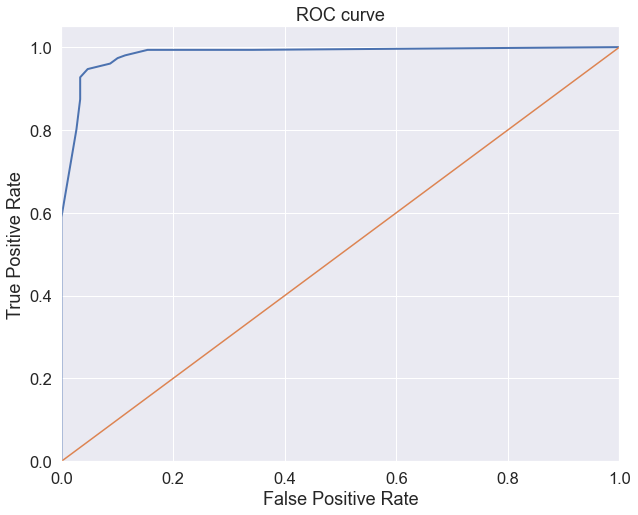

In [216]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Нормализация данных

Для метода KNN обязательно нужно нормализовать данные, так как считается расстояние между точками

В библиотеке sklearn есть класс StandardScaler для стандартизации входных данных

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#нормализуем только предикторы, не отклик(целевую переменную)
#Axis=1 показывает, что убирает столбец, а не строку, если axis=0, то удаляется строка
#fit обучает
scaler.fit(df.drop('TARGET CLASS', axis = 1))

#transform трансформирует (стандартизирует или нормализует данные предикторов)
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [218]:
scaled_features #результат массив numpy

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [220]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print('%.2f' %nca_pipe.score(X_test, y_test))

0.94


### рисование границ пример

C:\Users\IICT-320-02\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


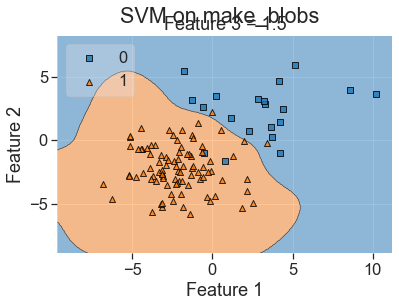

In [221]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
X, y = datasets.make_blobs(n_samples=600, n_features=3,
                           centers=[[2, 2, -2],[-2, -2, 2]],
                           cluster_std=[2, 2], random_state=2)

# Training a classifier
svm = SVC(gamma='auto')
svm.fit(X, y)

# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=svm,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

<b>Задание. </b> Для датасета Ирисы проведите классификацию методом к ближайших соседей.
Опишите ваши действия: 
* опишите датасет, 
* как вы разбили датасет на тестовую и обучающую выборку, 
* есть необходимость перевода признаков с типом данных object в цифры? Объясните свой ответ. 
* есть необходимость в нормализации признаков и если да, то почему? Объясните свой ответ. 
* при каком количестве соседей алгоритм показывает наилучшие значения?
* объясните какие результаты вы получили? что означают цифры в confusion matrix?
* измените количество соседей. Как изменилось качество классификации?
* Опишите полученные результаты. 